<a href="https://colab.research.google.com/github/silviabarasa/Week8CoreIP/blob/master/Week8IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic : Boosted Decision Trees and Support Vector Machines

# Python Classification_Programming: Decision_Trees_and _SVM

## Defining the Question

### a) Specifying the Data Analytic Question

> Determine whether  the patient has hypothyroid based on the given patient's symptoms tests.


### b) Defining the Metric for Success

1.A boosted decision tree model with accuracy score above 90 % 

2.A support Vector Machine model  with accuracy score above 90 % 

### c) Understanding the context 

Hypothyroidism: (Underactive Thyroid) Too Little Thyroid Hormone Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. Since the main purpose of thyroid hormone is to "run the body's metabolism," it is understandable that people with this condition will have symptoms associated with a slow metabolism.

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.



### d) Recording the Experimental Design

* Data preparation
* Data analysis
* Data modeling




### e) Data Relevance

* The provided data was appropriate for the classification analysis that was needed.

# Loading the required libraries

In [ ]:
#Importing our required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Reading the Data

In [ ]:
#Loading the dataset
df=pd.read_csv('/content/hypothyroid.csv')

> ***Previewing our dataset***

In [ ]:
#Previewing the first five rows of our dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
#Previewing the last five rows of our dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [ ]:
#Describing our dataset
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


> ***Previewing information of our dataset***

In [ ]:
#Checking the shape of our dataset
df.shape

(3163, 26)

In [ ]:
#Checking the datatypes of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

# Data Cleaning

In [ ]:
#Outliers
# checking for outliers using IQR Scores
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))


# The two commented lines of code below can be used to drop the outliers but for now I will not drop them since the whole dataset is important for my analysis

# df_no_outlier = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

# df_no_outlier

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3159,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3160,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3161,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Checking for null values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [ ]:
#Checking for duplicated values
df.duplicated().sum()

77

In [ ]:
#Dropping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# More data cleaning procedures
#
#checking for unique values in the different columns
for columns in df.columns:
    print('/n')
    print(df[columns].unique())

/n
['hypothyroid' 'negative']
/n
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
/n
['M' 'F' '?']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['y' 'n']
/n
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43'

In [ ]:
#converting the columns to lowercase and removing white spaces
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [ ]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [ ]:
#replacing the '?' in the sex column with the mode and confirming if it was changed
df['age']=df['age'].replace(['?'],np.nan)
df['tsh']=df['tsh'].replace(['?'],np.nan)
df['t3']=df['t3'].replace(['?'],np.nan)
df['tt4']=df['tt4'].replace(['?'],np.nan)
df['t4u']=df['t4u'].replace(['?'],np.nan)
df['fti']=df['fti'].replace(['?'],np.nan)
df['tbg']=df['tbg'].replace(['?'],np.nan)

In [ ]:
#we will the replace with the mode of each and every column
for column in df.columns:
    df[column].fillna(df[column].mode()[0])

In [ ]:
#coverting data from string to numeric
df[['age','tsh','t3','tt4','t4u','fti','tbg']] = df[['age','tsh','t3','tt4','t4u','fti','tbg']].apply(pd.to_numeric)
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
tsh_measured                  object
tsh                          float64
t3_measured                   object
t3                           float64
tt4_measured                  object
tt4                          float64
t4u_measured                  object
t4u                          float64
fti_measured                  object
fti                          float64
tbg_measured                  object
tbg                          float64
dtype: object

# encoding categorical columns

In [ ]:
#Label encoding  
from sklearn.preprocessing import LabelEncoder
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_features = df.columns[categorical_feature_mask].tolist()
categorical_features

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'tsh_measured',
 't3_measured',
 'tt4_measured',
 't4u_measured',
 'fti_measured',
 'tbg_measured']

In [ ]:
#getting the length of categorical_features
len(categorical_features)

19

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in columns
df['status']= label_encoder.fit_transform(df['status'])
df['sex']= label_encoder.fit_transform(df['sex'])
df['on_thyroxine']= label_encoder.fit_transform(df['on_thyroxine'])
df['lithium']= label_encoder.fit_transform(df['lithium'])
df['query_on_thyroxine']= label_encoder.fit_transform(df['query_on_thyroxine'])
df['on_antithyroid_medication']= label_encoder.fit_transform(df['on_antithyroid_medication'])
df['thyroid_surgery']= label_encoder.fit_transform(df['thyroid_surgery'])
df['query_hypothyroid']= label_encoder.fit_transform(df['query_hypothyroid'])
df['query_hyperthyroid']= label_encoder.fit_transform(df['query_hyperthyroid'])
df['pregnant']= label_encoder.fit_transform(df['pregnant'])
df['sick']= label_encoder.fit_transform(df['sick'])  
df['tumor']= label_encoder.fit_transform(df['tumor'])
df['goitre']= label_encoder.fit_transform(df['goitre'])
df['tsh_measured']= label_encoder.fit_transform(df['tsh_measured'])
df['t3_measured']= label_encoder.fit_transform(df['t3_measured'])
df['tt4_measured']= label_encoder.fit_transform(df['tt4_measured'])
df['t4u_measured']= label_encoder.fit_transform(df['t4u_measured'])
df['fti_measured']= label_encoder.fit_transform(df['fti_measured'])
df['tbg_measured']= label_encoder.fit_transform(df['tbg_measured'])
df['tbg']= label_encoder.fit_transform(df['tbg'])

In [ ]:
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
0,0,72.0,2,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,303
1,0,15.0,1,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,1897
2,0,24.0,2,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,1898
3,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,1899
4,0,77.0,2,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,1900


# Exploratory Data Analysis

## ***Univariate Analysis***

***##Measures of central tendancy***

In [ ]:
#mean
df.mean().sort_values(ascending=False)

tbg                          1351.417045
fti                           115.489080
tt4                           108.706922
age                            51.112538
tsh                             5.809320
t3                              1.933666
sex                             1.266040
t4u                             0.977559
status                          0.954310
fti_measured                    0.922878
t4u_measured                    0.922553
tt4_measured                    0.922229
tsh_measured                    0.852560
t3_measured                     0.779650
on_thyroxine                    0.144524
tbg_measured                    0.081335
query_hypothyroid               0.076150
query_hyperthyroid              0.076150
thyroid_surgery                 0.033377
sick                            0.031432
goitre                          0.031108
pregnant                        0.019767
query_on_thyroxine              0.017822
on_antithyroid_medication       0.013610
tumor           

In [ ]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [ ]:
#mode
d1 = df['status'].mode()
print("The mode for status is: \n", d1)
print('\n')
d2 = df['age'].mode()
print("The mode for age is: \n", d2)
print('\n')
d3 = df['sex'].mode()
print("The mode for sex is: \n", d3)
print('\n')
d4 = df['on_thyroxine'].mode()
print("The mode for on_thyroxine is: \n", d4)
print('\n')
d4 = df['query_on_thyroxine'].mode()
print("The mode for query_on_thyroxine is: \n", d4)
print('\n')
d4 = df['on_antithyroid_medication'].mode()
print("The mode for on_antithyroid_medication is: \n", d4)
print('\n')
d4 = df['thyroid_surgery'].mode()
print("The mode for thyroid_surgery is: \n", d4)
print('\n')
d4 = df['query_hypothyroid'].mode()
print("The mode for query_hypothyroid is: \n", d4)
print('\n')
d4 = df['query_hyperthyroid'].mode()
print("The mode for query_hyperthyroid is: \n", d4)
print('\n')
d4 = df['pregnant'].mode()
print("The mode for pregnant is: \n", d4)
print('\n')
d4 = df['sick'].mode()
print("The mode for sick is: \n", d4)
print('\n')
d4 = df['tumor'].mode()
print("The mode for tumor is: \n", d4)
print('\n')

d1 = df['lithium'].mode()
print("The mode for lithium is: \n", d1)
print('\n')
d2 = df['goitre'].mode()
print("The mode for goitre is: \n", d2)
print('\n')
d3 = df['tsh_measured'].mode()
print("The mode for tsh_measured is: \n", d3)
print('\n')
d4 = df['tsh'].mode()
print("The mode for tsh is: \n", d4)
print('\n')
d4 = df['t3_measured'].mode()
print("The mode for t3_measured is: \n", d4)
print('\n')
d4 = df['t3'].mode()
print("The mode for t3 is: \n", d4)
print('\n')
d4 = df['tt4_measured'].mode()
print("The mode for tt4_measured is: \n", d4)
print('\n')
d4 = df['tt4'].mode()
print("The mode for condition is: \n", d4)
print('\n')
d4 = df['t4u_measured'].mode()
print("The mode for t4u_measured is: \n", d4)
print('\n')
d4 = df['t4u'].mode()
print("The mode for t4u is: \n", d4)
print('\n')
d4 = df['fti_measured'].mode()
print("The mode for fti_measured is: \n", d4)
print('\n')
d4 = df['fti'].mode()
print("The mode for fti is: \n", d4)
print('\n')

d4 = df['tbg'].mode()
print("The mode for tbg is: \n", d4)
print('\n')
d4 = df['tbg_measured'].mode()
print("The mode for tbg_measured is: \n", d4)
print('\n')





The mode for status is: 
 0    1
dtype: int64


The mode for age is: 
 0    59.0
dtype: float64


The mode for sex is: 
 0    1
dtype: int64


The mode for on_thyroxine is: 
 0    0
dtype: int64


The mode for query_on_thyroxine is: 
 0    0
dtype: int64


The mode for on_antithyroid_medication is: 
 0    0
dtype: int64


The mode for thyroid_surgery is: 
 0    0
dtype: int64


The mode for query_hypothyroid is: 
 0    0
dtype: int64


The mode for query_hyperthyroid is: 
 0    0
dtype: int64


The mode for pregnant is: 
 0    0
dtype: int64


The mode for sick is: 
 0    0
dtype: int64


The mode for tumor is: 
 0    0
dtype: int64


The mode for lithium is: 
 0    0
dtype: int64


The mode for goitre is: 
 0    0
dtype: int64


The mode for tsh_measured is: 
 0    1
dtype: int64


The mode for tsh is: 
 0    0.0
dtype: float64


The mode for t3_measured is: 
 0    1
dtype: int64


The mode for t3 is: 
 0    1.6
1    1.8
dtype: float64


The mode for tt4_measured is: 
 0    1
dtype: i

In [ ]:
#median for numeric variables
d1 = df.median().sort_values(ascending=False)
d1

tbg                          1343.50
fti                           107.00
tt4                           104.00
age                            54.00
t3                              1.80
sex                             1.00
tsh_measured                    1.00
t3_measured                     1.00
status                          1.00
tt4_measured                    1.00
t4u_measured                    1.00
fti_measured                    1.00
t4u                             0.96
tsh                             0.70
thyroid_surgery                 0.00
on_thyroxine                    0.00
query_on_thyroxine              0.00
on_antithyroid_medication       0.00
query_hyperthyroid              0.00
query_hypothyroid               0.00
pregnant                        0.00
sick                            0.00
tumor                           0.00
tbg_measured                    0.00
goitre                          0.00
lithium                         0.00
dtype: float64

***##Measures of dispersion***

In [ ]:
#Standard deviation for numeric variables
d1 = df.std().sort_values(ascending=False)
d1

tbg                          878.470840
fti                           60.147649
tt4                           44.606704
tsh                           24.023192
age                           19.275099
t3                             0.979488
sex                            0.492597
t3_measured                    0.414550
tsh_measured                   0.354602
on_thyroxine                   0.351677
tbg_measured                   0.273393
tt4_measured                   0.267854
t4u_measured                   0.267342
fti_measured                   0.266829
query_hyperthyroid             0.265282
query_hypothyroid              0.265282
t4u                            0.225796
status                         0.208846
thyroid_surgery                0.179647
sick                           0.174511
goitre                         0.173638
pregnant                       0.139220
query_on_thyroxine             0.132327
on_antithyroid_medication      0.115883
tumor                          0.113128


In [ ]:
#Variance for numeric variables
d1 = df.var().sort_values(ascending=False)
d1

tbg                          771711.015969
fti                            3617.739631
tt4                            1989.758058
tsh                             577.113776
age                             371.529454
t3                                0.959396
sex                               0.242652
t3_measured                       0.171852
tsh_measured                      0.125742
on_thyroxine                      0.123677
tbg_measured                      0.074744
tt4_measured                      0.071746
t4u_measured                      0.071472
fti_measured                      0.071198
query_hyperthyroid                0.070374
query_hypothyroid                 0.070374
t4u                               0.050984
status                            0.043617
thyroid_surgery                   0.032273
sick                              0.030454
goitre                            0.030150
pregnant                          0.019382
query_on_thyroxine                0.017510
on_antithyr

***##Skeweness and kurtosis***

In [ ]:
#finding the skewness
df.skew().sort_values(ascending=False)

lithium                      39.261928
tsh                          10.291931
tumor                         8.615990
on_antithyroid_medication     8.399915
query_on_thyroxine            7.292388
pregnant                      6.903380
goitre                        5.404288
sick                          5.373542
fti                           5.212065
thyroid_surgery               5.198265
query_hypothyroid             3.197543
query_hyperthyroid            3.197543
tbg_measured                  3.064716
t3                            2.166922
on_thyroxine                  2.022919
tt4                           1.467828
t4u                           0.952168
sex                           0.448927
tbg                           0.041312
age                          -0.169789
t3_measured                  -1.350050
tsh_measured                 -1.989775
tt4_measured                 -3.154732
t4u_measured                 -3.163196
fti_measured                 -3.171708
status                   

In [ ]:
#  kurtosis 
df.kurt()

status                         16.963819
age                            -0.959392
sex                            -0.478826
on_thyroxine                    2.093556
query_on_thyroxine             51.212118
on_antithyroid_medication      68.603033
thyroid_surgery                25.038187
query_hypothyroid               8.229613
query_hyperthyroid              8.229613
pregnant                       45.686261
sick                           26.892381
tumor                          72.282135
lithium                      1540.497405
goitre                         27.223973
tsh_measured                    1.960474
tsh                           153.669525
t3_measured                    -0.177482
t3                             10.953692
tt4_measured                    7.957493
tt4                             6.849887
t4u_measured                    8.010999
t4u                             3.431495
fti_measured                    8.064959
fti                            48.502934
tbg_measured    

In [ ]:
#summary statistics
df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti,tbg_measured,tbg
count,3086.000000,2648.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,2631.000000,3086.00000,2406.000000,3086.000000,2846.000000,3086.000000,2847.000000,3086.000000,2848.000000,3086.000000,3086.000000
mean,0.954310,51.112538,1.266040,0.144524,0.017822,0.013610,0.033377,0.076150,0.076150,0.019767,0.031432,0.012962,0.000648,0.031108,0.852560,5.809320,0.77965,1.933666,0.922229,108.706922,0.922553,0.977559,0.922878,115.489080,0.081335,1351.417045
std,0.208846,19.275099,0.492597,0.351677,0.132327,0.115883,0.179647,0.265282,0.265282,0.139220,0.174511,0.113128,0.025453,0.173638,0.354602,24.023192,0.41455,0.979488,0.267854,44.606704,0.267342,0.225796,0.266829,60.147649,0.273393,878.470840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,1.400000,1.000000,83.000000,1.000000,0.850000,1.000000,91.000000,0.000000,572.250000
50%,1.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.700000,1.00000,1.800000,1.000000,104.000000,1.000000,0.960000,1.000000,107.000000,0.000000,1343.500000
75%,1.000000,67.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.200000,1.00000,2.300000,1.000000,127.000000,1.000000,1.060000,1.000000,129.000000,0.000000,2114.750000
max,1.000000,98.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.00000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000,1.000000,2886.000000


> <font color='yellow'>Histograms</font>

Text(0, 0.5, 'Count')

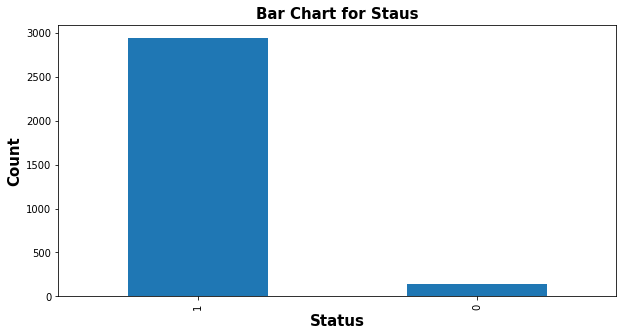

In [ ]:
# creating the bar plot
plt.figure(figsize=(10,5))
plotdata = df['status'].value_counts()
plotdata.plot(kind="bar")
plt.title('Bar Chart for Staus', fontweight='bold',fontsize=15)
plt.xlabel('Status',fontweight='bold',fontsize=15)
plt.ylabel('Count',fontweight='bold',fontsize=15)

## ***Bivariate Analysis***

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

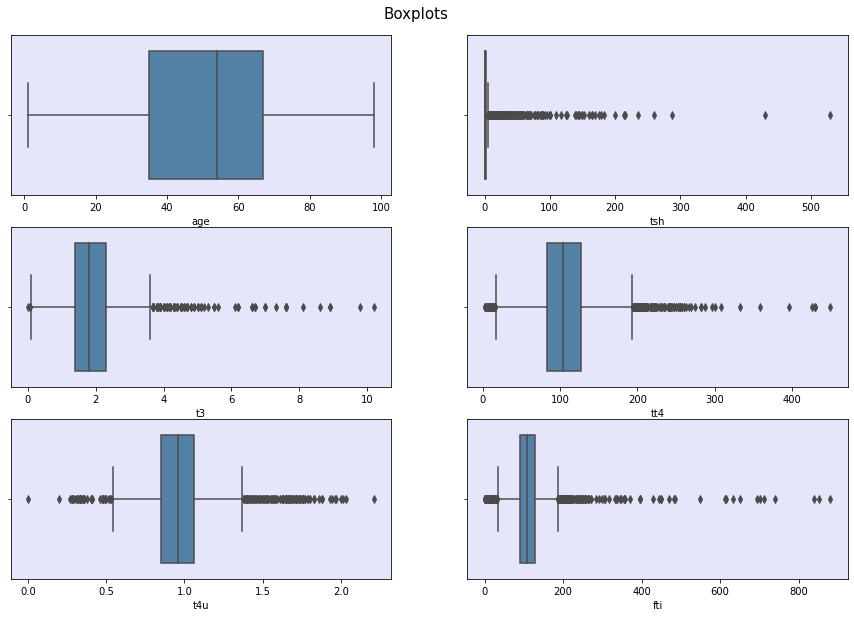

In [ ]:
# Boxplots
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['age','tsh','t3','tt4','t4u','fti']
colors = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))
plt.suptitle('Boxplots', fontsize = 15, y = 0.92, color = 'black')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
  sns.boxplot(df[column], ax = ax, color = color)
  ax.set_facecolor('lavender')

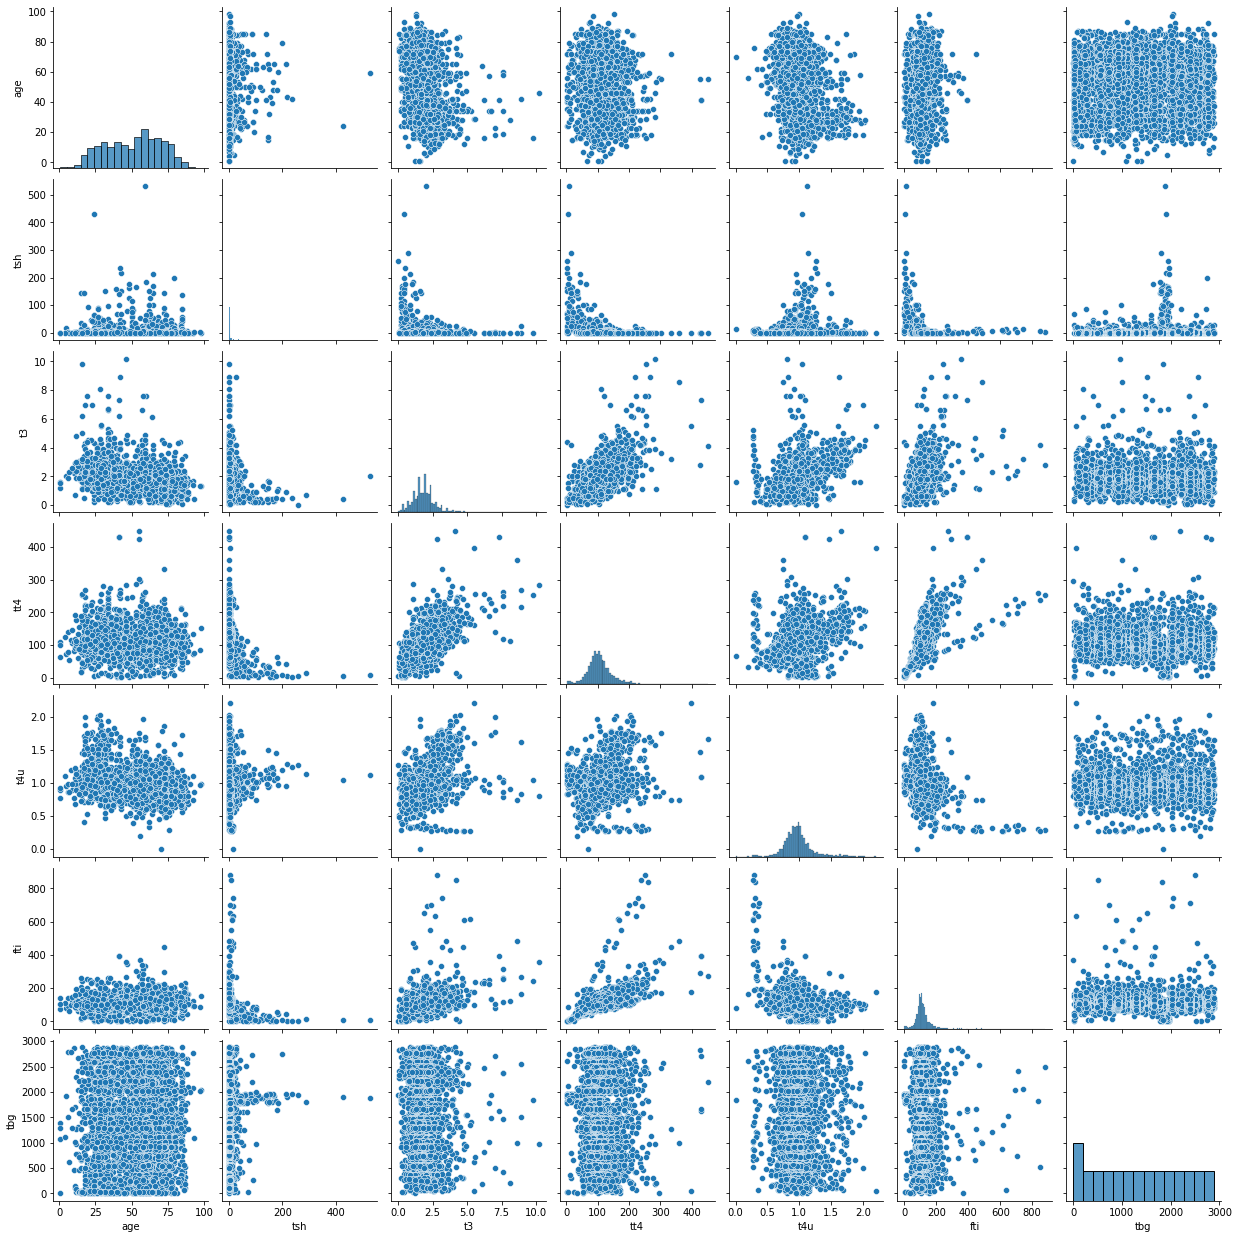

In [ ]:
columns =['age','tsh','t3','tt4','t4u','fti','tbg']
sns.pairplot(df[columns])

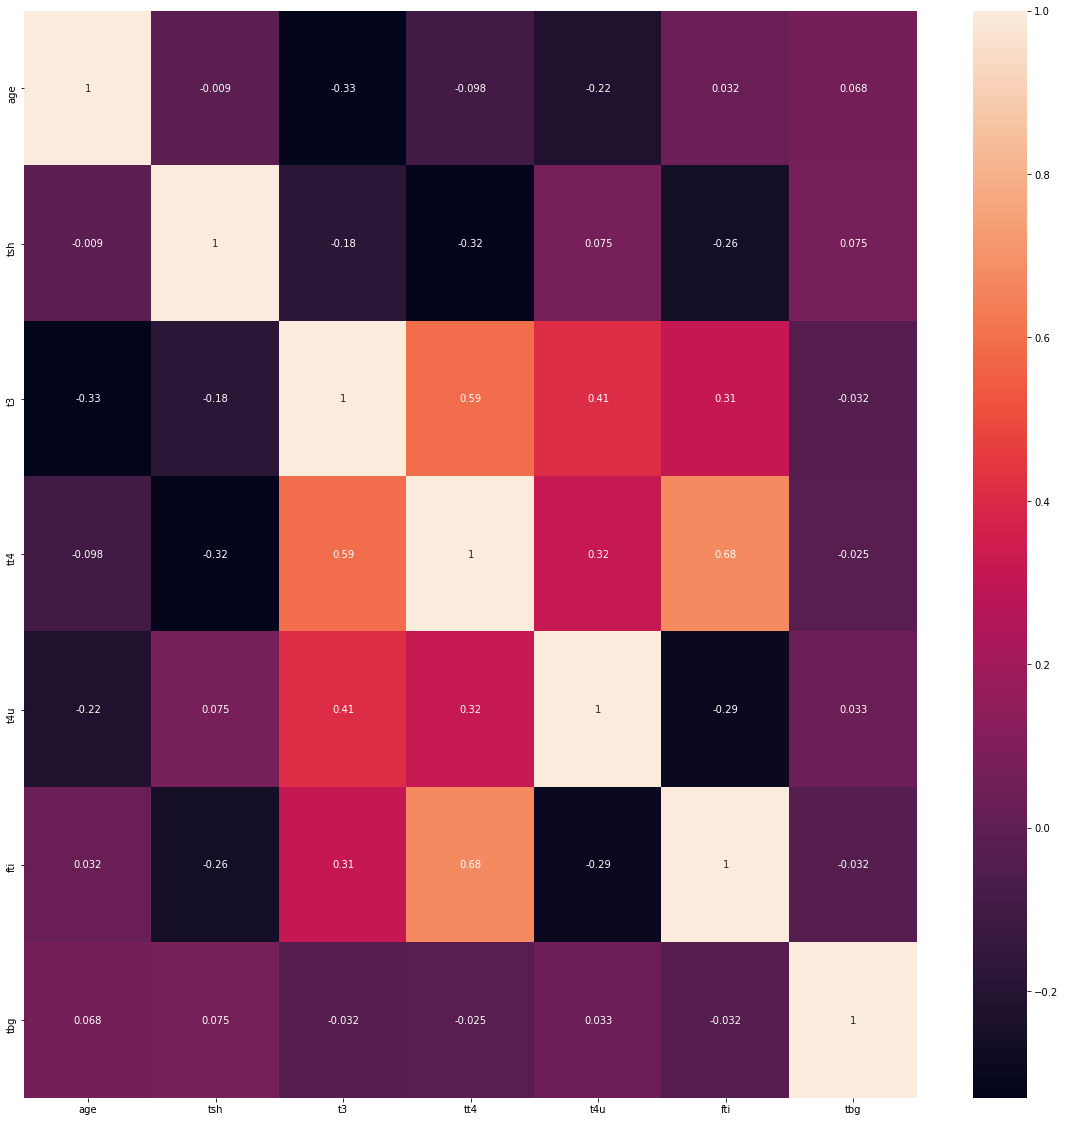

In [ ]:
#correlation matrix
#  showing correlation on a heatmap
columns =['age','tsh','t3','tt4','t4u','fti','tbg']
plt.figure(figsize=(20,20))
sns.heatmap(df[columns].corr(),annot=True)
plt.show()

<function matplotlib.pyplot.show>

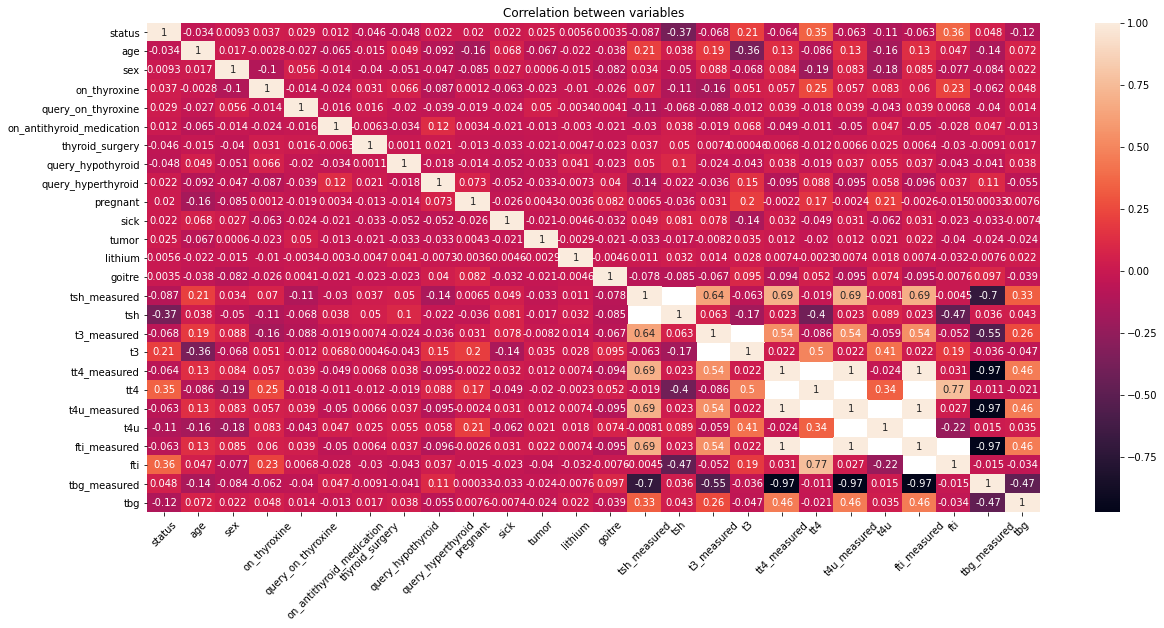

In [ ]:
#heatmap
#checking for correlation using spearman method
plt.figure(figsize=(20,9))
correlation_matrix=df.corr(method = 'spearman')
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


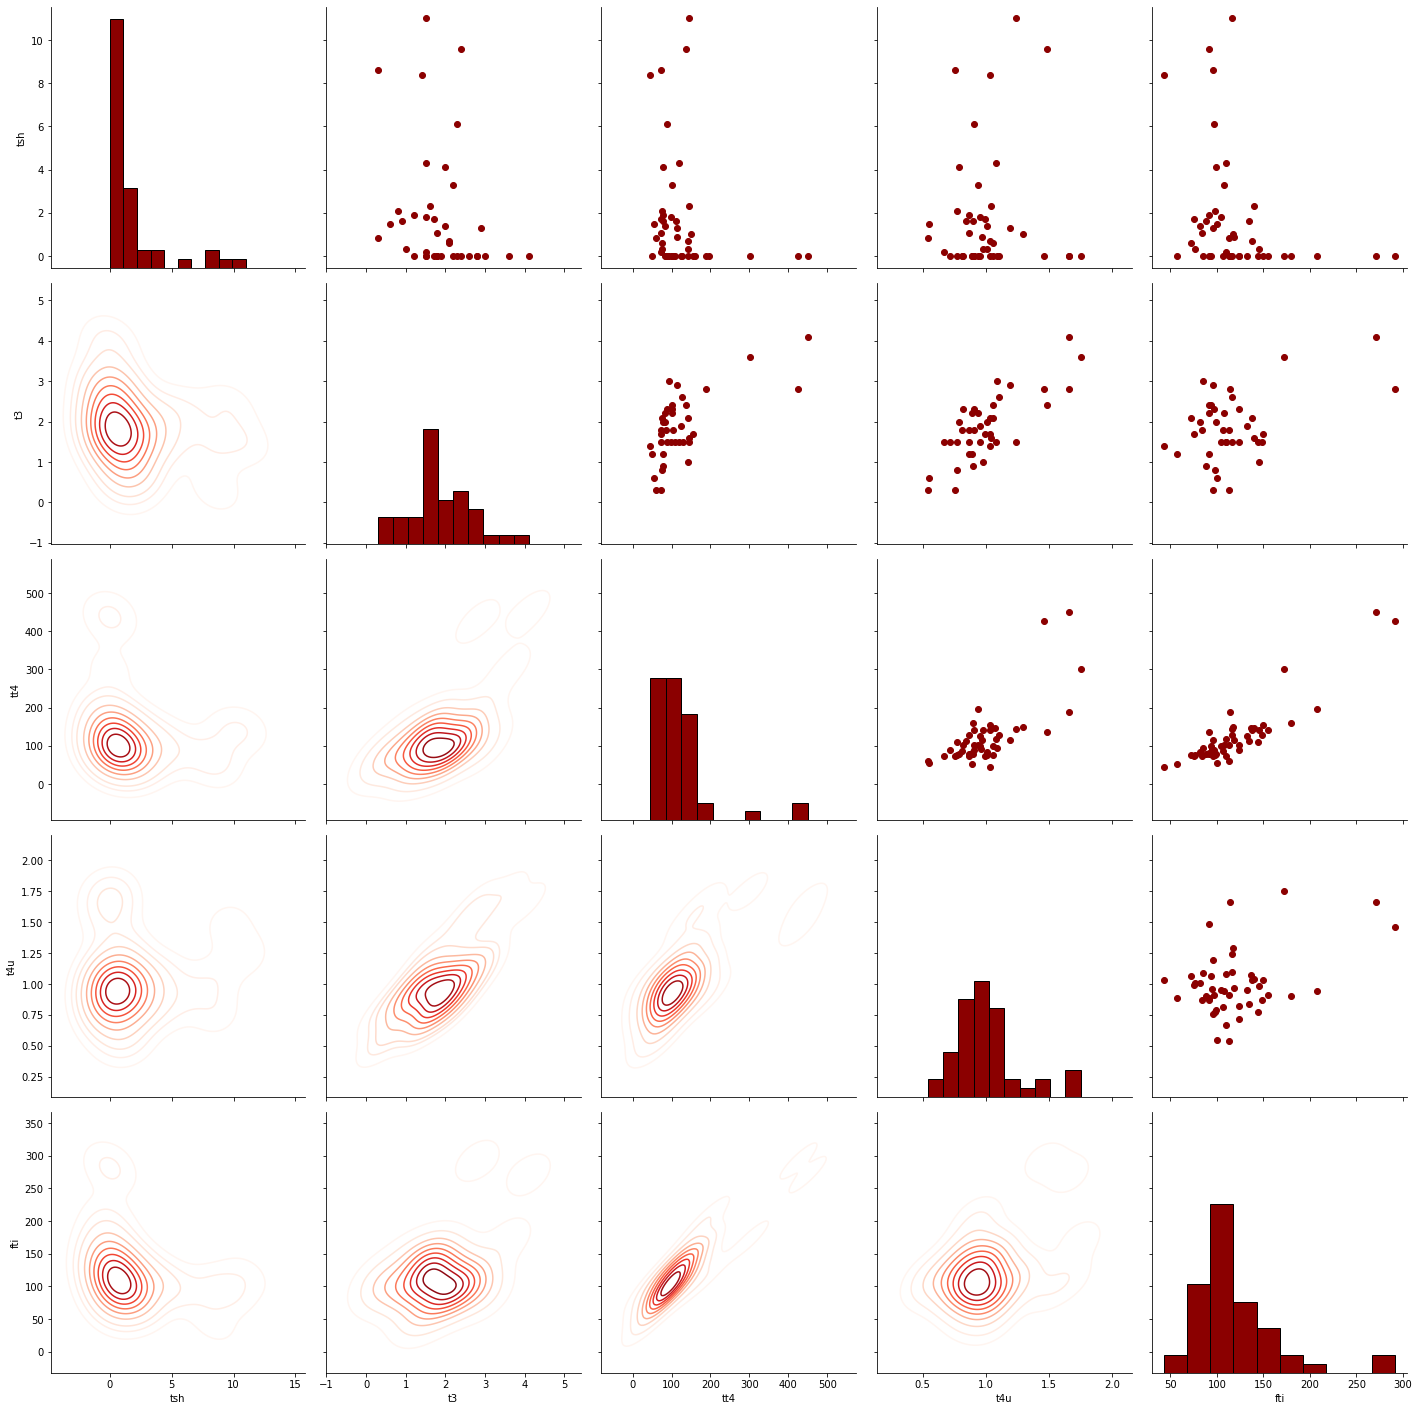

In [ ]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= df[df['age']==55],vars = ['tsh','t3','tt4','t4u','fti'], size = 4)
# Map a scatter plot to the upper triangle
grid = grid.map_upper(plt.scatter, color = 'darkred')
# Mapping a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins = 10, color = 'darkred',edgecolor = 'k')
# Mappping a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')

## Observations from the univariate plots
> **1.Distribution**

nomarl distribution-T3,TT4, have an almost perfect nomarl distribution

multimodal distribution-T4U

unimodal distribution-TSH

> **2.Skewness**

'TSH','T3','TT4','T4U','FTI'- are right skewed

>**3.Correlation**

From the heatmap there is moderate corerelation between:
TSH-TT4-0.5
TT4-FTI-0.77

>**4.Outliers/Abnomality**

TSH','T3','TT4','T4U','FTI' have outliers but being a medical data it is considered sensitive





In [ ]:
df.dropna(inplace=True)

# Implementing the Solution

In [ ]:
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg'],
      dtype='object')

In [ ]:
#Selecting the target and features
test_features =['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'tsh_measured', 'tsh', 't3_measured', 't3', 'tt4_measured', 'tt4',
       't4u_measured', 't4u', 'fti_measured', 'fti', 'tbg_measured', 'tbg']
X = df[test_features].values
y = df['status']
print("shape of X:",X.shape)
print("shape of y:",y.shape)


shape of X: (1958, 25)
shape of y: (1958,)


In [ ]:
from sklearn.model_selection import train_test_split
#splitting Dataset into Train and Test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

## <font color="yellow">*SOLUTION 1: CLASSIFICATION MODEL WITH BOOSTED DECISION TREES*</font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#fitting the classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

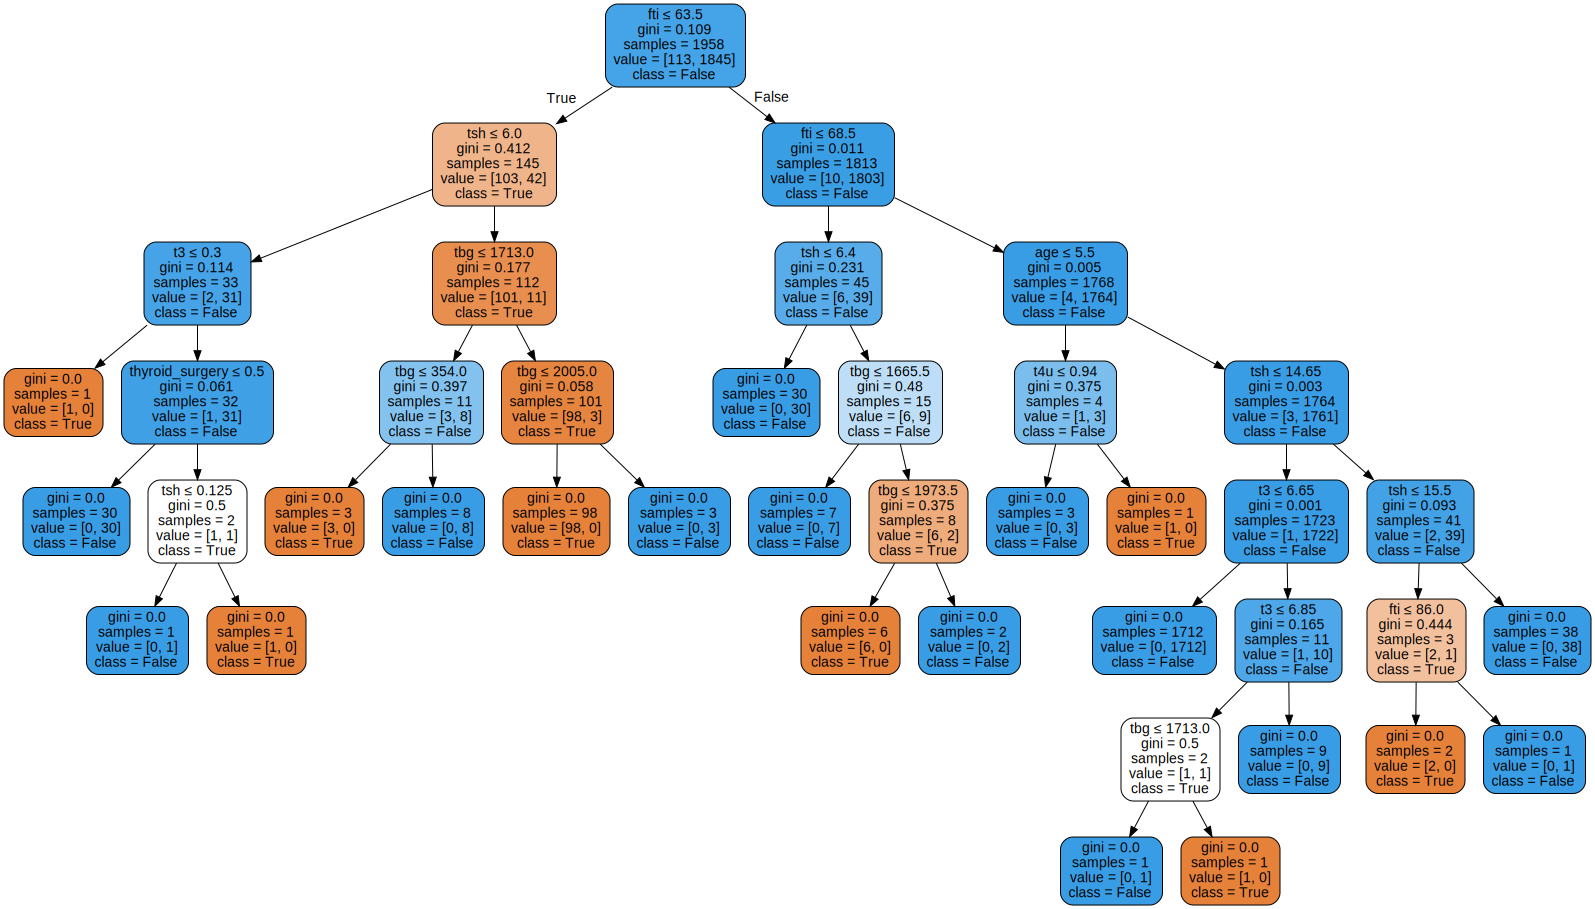

In [ ]:
#visualizing the tree
import matplotlib.pyplot as plt
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names = test_features,
                class_names=['True', 'False'],
                filled=True, rounded=True,
                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
# Predict based on the model we've trained
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy, checks how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


### <font color="yellow">*Feature Importance.*</font>

In [ ]:
# Get numerical feature importances
importances = clf.feature_importances_

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('tsh_measured', 0.0), ('tsh', 0.2), ('t3_measured', 0.0), ('t3', 0.01), ('tt4_measured', 0.0), ('tt4', 0.0), ('t4u_measured', 0.0), ('t4u', 0.01), ('fti_measured', 0.0), ('fti', 0.64), ('tbg_measured', 0.0), ('tbg', 0.13)]

Variable: fti                  Importance: 0.64
Variable: tsh                  Importance: 0.2
Variable: tbg                  Importance: 0.13
Variable: t3                   Importance: 0.01
Variable: t4u                  Importance: 0.01
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: t

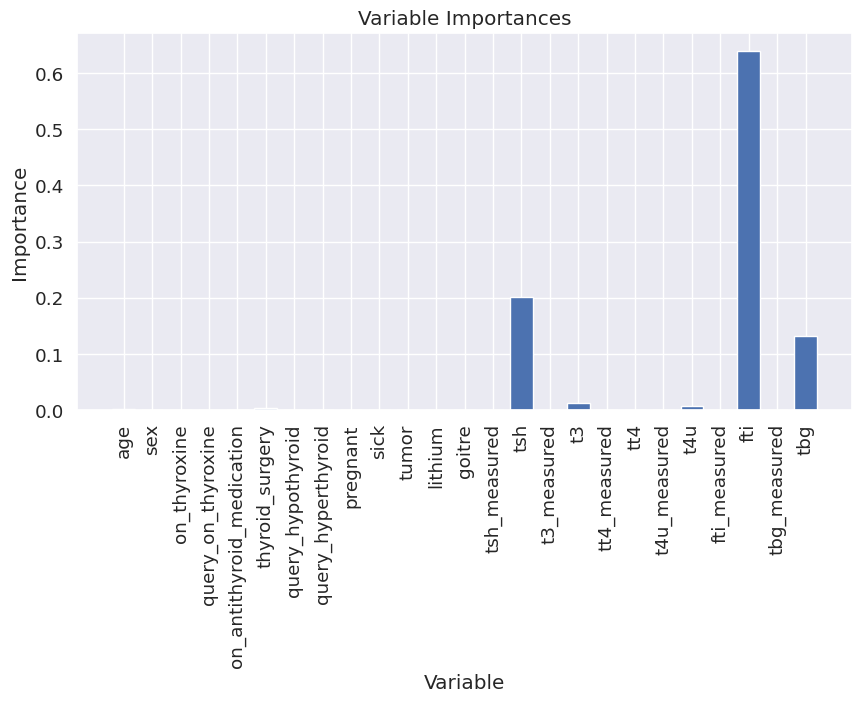

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5),dpi=100)
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


### <font color="yellow">*REPEATING WITH BOOSTED DECISION TREES*</font>

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier,GradientBoostingClassifier

### <font color="yellow">*Ada Boost Classifier*</font>

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9948979591836735


### <font color="yellow">*Gradient Boosting Classifier*</font>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#splitting Dataset into Train and Test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)

Confusion Matrix:
[[ 35   1]
 [ 10 542]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        36
           1       1.00      0.98      0.99       552

    accuracy                           0.98       588
   macro avg       0.89      0.98      0.93       588
weighted avg       0.98      0.98      0.98       588



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='deviance', max_depth=2,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# Create gradient boost classifer object
abc = GradientBoostingClassifier(n_estimators=50,
                         learning_rate=1)
# Train gradient boost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
#Predict the response for test dataset
y_pred = model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9948979591836735


### <font color="yellow">***Summary of Ada Boost,Random Forest,Gradient Boosting classifier*** </font>

In [ ]:
#model ensemble
models = [
    RandomForestClassifier(random_state=0),
    AdaBoostClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0)
]

In [ ]:
#spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#fitting the models
#creating objects for test and train scores
Train_Scores = "Train accuracy"
Test_Scores = "Test accuracy"
#function to evaluate the models
def evaluate_models(models, model_names=None):
    if not model_names:
        model_names = [type(model).__name__ for model in models]    
    scores = pd.DataFrame(index=[Train_Scores, Test_Scores])
    #for loop to iterate over the models
    for model, model_name in zip(models, model_names):
      #fitting the models
        model.fit(X_train, y_train)
        scores.at[Train_Scores, model_name] = \
            model.score(X_train, y_train)
        scores.at[Test_Scores, model_name] = \
            model.score(X_test, y_test)
    return scores
evaluate_models(models)


,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
Train accuracy,1.000000,1.000000,1.000000
Test accuracy,0.996599,0.994898,0.998299


In [ ]:
#Solution with Grid Search Technique
#searching for the best parameters
from sklearn.model_selection import GridSearchCV

number_folds = 5

gradient_boosting_params = {
    "n_estimators": [152],
    "learning_rate": [0.1],
    "max_depth": [4, 6, 8, 10],
    "subsample": [0.4, 0.6, 0.8, 1.0],
    "max_features": [0.5, 0.75, 1.0]
}
#boosting the model
boost_model = models[1]
boost_model = GridSearchCV(
    estimator=GradientBoostingClassifier(
        random_state=0
    ),
    param_grid=gradient_boosting_params,
    cv=number_folds
)
boost_model.fit(X_train, y_train)
predictions = boost_model.predict(X_test)

In [ ]:
#checking the boosted model predictions using Grid_search technique
len(predictions)

588

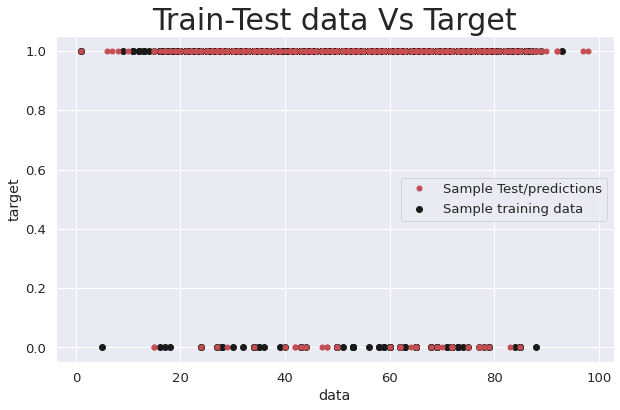

In [ ]:
#Scatterplot visualization of predictions
# Plot the results
plt.figure(figsize=(10,6))
plt.scatter(X_train[:,0:1], y_train, c="k", label="Sample training data")
plt.plot(X_test[:,0:1], predictions[0:588], c="r", label="Sample Test/predictions",linewidth=2,ls="none", marker='.', ms=10)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Train-Test data Vs Target",fontsize=(30))
plt.legend()
plt.show()

In [ ]:
#Accuracy report for the model 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00       552

    accuracy                           1.00       588
   macro avg       1.00      1.00      1.00       588
weighted avg       1.00      1.00      1.00       588




## <font color="yellow">*SOLUTION 2 : CLASSIFICATION MODEL WITH SUPPORT VECTOR MACHINES*</font>

### Linear SVC

### <font color="yellow">***radial basis function*** </font>

shape of X: (1958, 2)
shape of Y: (1958,)
------RADIAL KERNEL MODEL-----


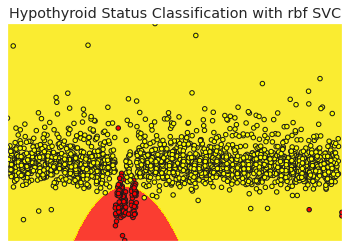

The Radial kernel model accuracy_score:  0.9914965986394558
The Radial kernel model confusion_matrix: 
[[ 32   4]
 [  1 551]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
#Fitting the models
# the reduction PCA
pca = PCA(n_components=2).fit(df)
X = pca.transform(df)
X.shape,y.shape
print("shape of X:",X.shape)
print("shape of Y:",y.shape)
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
print("------RADIAL KERNEL MODEL-----")
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)
# mesh grid the graph
def make_meshgrid(x, y, h=.05):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# createing the hyperplanes 
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Status Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1,h=.5)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
# making prediction
y_pred = rbfclassifier.predict(X_test)
# Model Evaluation
print("The Radial kernel model accuracy_score: ",accuracy_score(y_test, y_pred))
print("The Radial kernel model confusion_matrix: ")
#
#
#
print(confusion_matrix(y_test, y_pred))

### <font color="yellow">***sigmoid Model*** </font>

------SIGMOID KERNEL MODEL-----


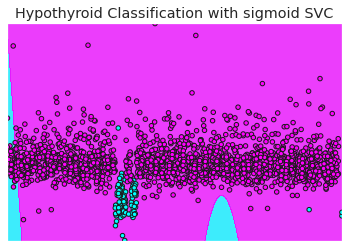

The Sigmoid kernel model accuracy_score:  0.9132653061224489
TheSigmoid kernel model confusion_matrix: 
[[  0  36]
 [ 15 537]]


In [ ]:
print("------SIGMOID KERNEL MODEL-----")
## SIGMOID
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
#using the training set
sigclassifier.fit(X_train, y_train)
# mesh grid for the graph
def make_meshgrid(x, y, h=.5):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

#creating the hyperplanes
def plot_contours(ax, clf, xx, yy, **params):
    Z = sigclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Hypothyroid Classification with sigmoid SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1,h=.5)

plot_contours(ax, sigclassifier, xx, yy, cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
# making prediction
y_pred = sigclassifier.predict(X_test)
# Model Evaluation
print("The Sigmoid kernel model accuracy_score: ",accuracy_score(y_test, y_pred))
#
#
#
print("TheSigmoid kernel model confusion_matrix: ")
print(confusion_matrix(y_test, y_pred))


### <font color='yellow'>***Polynomial model*** </font>


In [ ]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
#Fitting the model
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [ ]:
#Making predictions
poly_pred = poly.predict(X_test)
accuracy_poly = poly.score(X_test,y_test)
print("The poly kernel model accuracy: ", accuracy_poly)
accuracy_poly
print("The poly kernel model confusion_matrix: ")
print(confusion_matrix(y_test, y_pred))

The poly kernel model accuracy:  0.9404761904761905
The poly kernel model confusion_matrix: 
[[ 36   0]
 [  3 549]]


Comparison of the Kernel Performance

When we compare the performance of the three kernel, it clear that sigmoid performs the worst. This is because the sigmoid function returns two values, 0 and 1 hence its more suited to binary classification problems.

On the other hand, we can see that the rbf kernel also know as Gaussian Kernel achieved a 99.15 prediction rate. However, there is no set rule as to which kernel to use for which scenario. the rule of thumb is that you should test all kernels and select the one that performs the best on your dataset

###<font color='yellow'>***REPEATING THE SVM MODEL WITH PARAMETER TUNING*** </font>

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.svm
import sklearn.metrics
import sklearn.pipeline
#list of SVM kernels
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
#This function selects and returns the corresponding SVC model using nested if statement
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")
    for i in range(4):
    # Separate data into test and training sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# Train a SVC model using different kernal
        svclassifier = getClassifier(i) 
        svclassifier.fit(X_train, y_train)
# Make prediction
        y_pred = svclassifier.predict(X_test)
# Evaluate our model
        print("Evaluation:", kernels[i], "kernel")
        print(classification_report(y_test,y_pred))

In [ ]:
# Perform a grid search to find the best hyperparameters
def grid_search(X, y):
    # Create a pipeline
    clf_pipeline = sklearn.pipeline.Pipeline([
        ('m', sklearn.svm.LinearSVC(loss='squared_hinge', tol=0.0001, multi_class='ovr', dual=False, class_weight=None, verbose=0, random_state=None, max_iter=10000))
        ])
    # Set parameters (name in pipeline + name of parameter)
    parameters = { 
        'm__penalty': ('l1', 'l2'), 
        'm__C': (0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0), 
        'm__fit_intercept': (False, True),
        'm__intercept_scaling': (0.5, 1, 2),
         }
    # Create a grid search classifier
    gs_classifier = sklearn.model_selection.GridSearchCV(clf_pipeline, parameters, cv=10, iid=False, n_jobs=2, scoring='accuracy', verbose=1)
    
    print("Warning: Starting a grid search (it takes lots of time:your patience required)")
    gs_classifier = gs_classifier.fit(X, y)

    # Print results
    print('---- Results ----')
    print('Best score: ' + str(gs_classifier.best_score_))
    for name in sorted(parameters.keys()):
        print('{0}: {1}'.format(name, gs_classifier.best_params_[name]))
# Predict and evaluate on test data
def train_and_evaluate(X, y):
    rbfclassifier = SVC(kernel='rbf')
    # Training the model using the training set
    rbfclassifier.fit(X, y)
    predictions = rbfclassifier.predict(X)
    # Print results
    print('\n---- Results ----')
    accuracy = sklearn.metrics.accuracy_score(y, predictions)
    print('\nAccuracy: {0:.2f}'.format(accuracy * 100.0))
    print('\nClassification Report:')
    print(sklearn.metrics.classification_report(y, predictions))
    print('Confusion Matrix:')
    print(sklearn.metrics.confusion_matrix(y, predictions))

In [ ]:
import numpy as np
def main():
   # checks for the class imbalance
    print('\n--- Class balance ---\n')
    print(np.unique(y_train, return_counts=True))
    print(np.unique(y_test, return_counts=True))
    # Perform a grid search
    grid_search(X, y)
    # Train and evaluate
    train_and_evaluate(X_train, y_train)
    # Predict on test set
    #predict_and_evaluate(X_test, y_test)
# entry point for the main method
if __name__ == "__main__": main()


--- Class balance ---

(array([0, 1]), array([  77, 1293]))
(array([0, 1]), array([ 36, 552]))
Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 128 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 728 tasks      | elapsed:   18.1s


---- Results ----
Best score: 0.9785426478283622
m__C: 0.2
m__fit_intercept: True
m__intercept_scaling: 2
m__penalty: l2

---- Results ----

Accuracy: 94.53

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        77
           1       0.95      1.00      0.97      1293

    accuracy                           0.95      1370
   macro avg       0.97      0.51      0.51      1370
weighted avg       0.95      0.95      0.92      1370

Confusion Matrix:
[[   2   75]
 [   0 1293]]


[Parallel(n_jobs=2)]: Done 1080 out of 1080 | elapsed:   27.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


## Challenging the solution

> The models performance for both decision trees and Support Vector Machines was above 95%.This is an indication of overfitting.

    Test accuracy
- Gradient Boosting:99.3	

- RandomForestClassifier: 99.66

- AdaBoostClassifier: 99.49


SVM

- Radial Basis Function:99.15
- Sigmoid Model:91.33
- Polynimial model: 94.05      

**Causes of overfitting**

This was due to imbalanced classes as detected in the SVM:

--- Class balance ---

(array([0, 1]), array([  77, 1293]))

(array([0, 1]), array([ 36, 552]))

**consider class imbalance techniques such as SMOTE**







## Follow up questions

### a). Did we have the right data?

**NO: There was class imbalance**

### b). Do we need other data to answer our question?
**Yes: Data with balanced classes**

### c). Did we have the right question?
**Yes**


# Conclusion